In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
train_data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [4]:
train_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [5]:
train_data.groupby(['Sex','Pclass']).mean().Survived

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

## Coorelation btw number of siblings to survival rate


In [22]:
train_data.groupby('SibSp').mean().sort_index(ascending=False)

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028


In [23]:
train_data.groupby('SibSp').count().sort_index(ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
8,7,7,7,7,7,0,7,7,7,0,7
5,5,5,5,5,5,5,5,5,5,0,5
4,18,18,18,18,18,18,18,18,18,0,18
3,16,16,16,16,16,12,16,16,16,3,16
2,28,28,28,28,28,25,28,28,28,6,28
1,209,209,209,209,209,183,209,209,209,69,209
0,608,608,608,608,608,471,608,608,608,126,606


In [24]:
num_sib=train_data.groupby('SibSp').mean()['Survived']

<IPython.core.display.Javascript object>


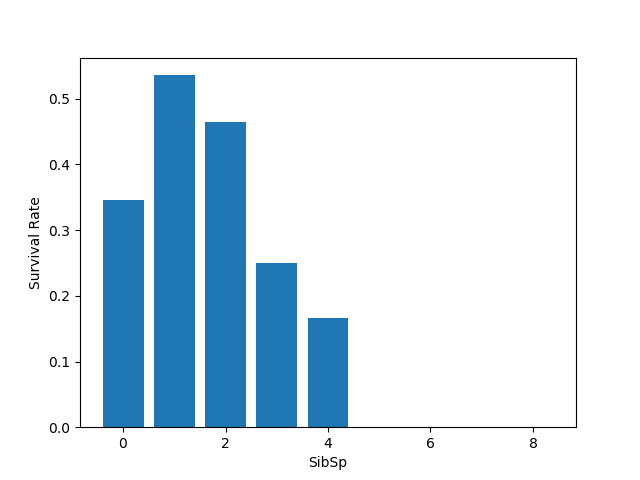

In [25]:

plt.figure()
plt.bar(num_sib.index,num_sib)
plt.ylabel('Survival Rate')
plt.xlabel('SibSp')

In [26]:
train_data.groupby('Pclass').std()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,246.737616,0.484026,14.802856,0.611898,0.693997,78.380373
2,250.852161,0.500623,14.001077,0.601633,0.690963,13.417399
3,264.441453,0.428949,12.495398,1.374883,0.888861,11.778142


## Coorelation btw fare and survival rate

<IPython.core.display.Javascript object>


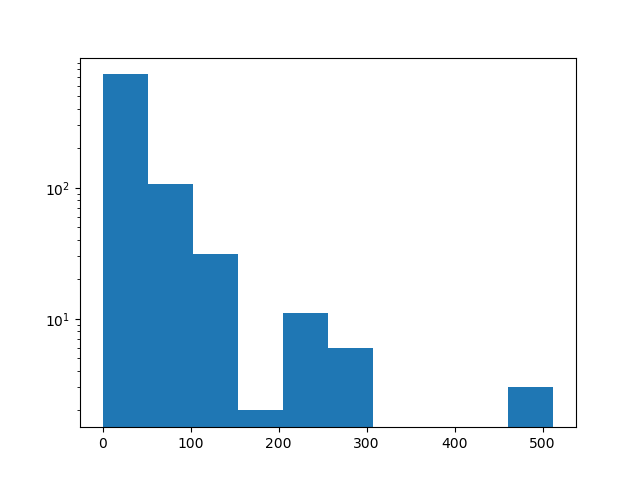

In [27]:
plt.figure()
plt.hist(train_data.Fare)
plt.yscale('log')

In [28]:
train_data[train_data['Fare']<13].Survived.mean()

0.23316062176165803

In [29]:
train_data[(train_data['Fare']>13) & (train_data['Fare']<20)].Survived.mean()

0.42528735632183906

In [30]:
train_data[(train_data['Fare']>20)].Survived.mean()

0.5292553191489362

In [31]:
train_data[(train_data['Fare']>250) & (train_data['Fare']<270)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


In [32]:
mean_fare_pclass=train_data.groupby('Pclass').mean()['Fare']
mean_fare_pclass

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [33]:
num=np.linspace(0,270,100)

In [34]:
num_rounded=[round(i,1) for i in num]

In [35]:
num_survived=[]
for i in range(len(num)):
    if (i>0) & (i==len(num)):
        a=train_data[(train_data.Fare>num[i]) & (train_data.Fare<num[i+1])].Survived.mean()
        num_survived.append(a)
    elif i==0:
        a=a=train_data[(train_data.Fare<num[i])].Survived.mean()
        num_survived.append(a)
    else:
        a=a=train_data[(train_data.Fare>num[i])].Survived.mean()
        num_survived.append(a)
    
    

<IPython.core.display.Javascript object>


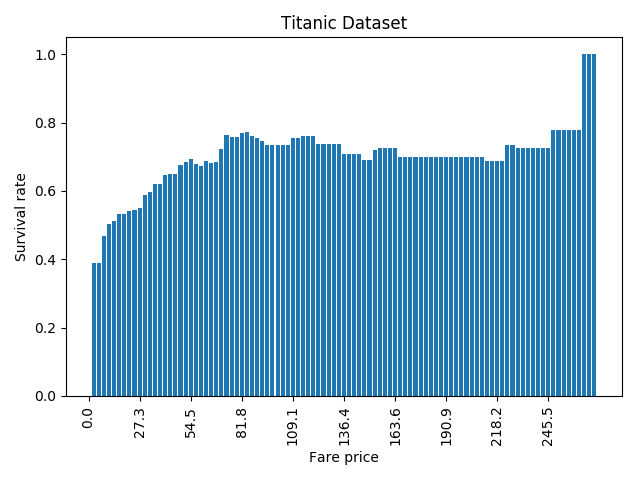

In [36]:

ind=np.arange(len(num))
ind_t=[i for i in range(0,100,10)]
num_survived_t=[num_rounded[i] for i in ind_t]
plt.figure()
plt.bar(ind,num_survived)
plt.xticks(ind_t,num_survived_t,rotation='vertical')
plt.ylabel('Survival rate')
plt.xlabel('Fare price')
plt.title('Titanic Dataset')
plt.tight_layout()

## Parch relationship to survival

In [37]:
parch_sur.index

NameError: name 'parch_sur' is not defined

<IPython.core.display.Javascript object>


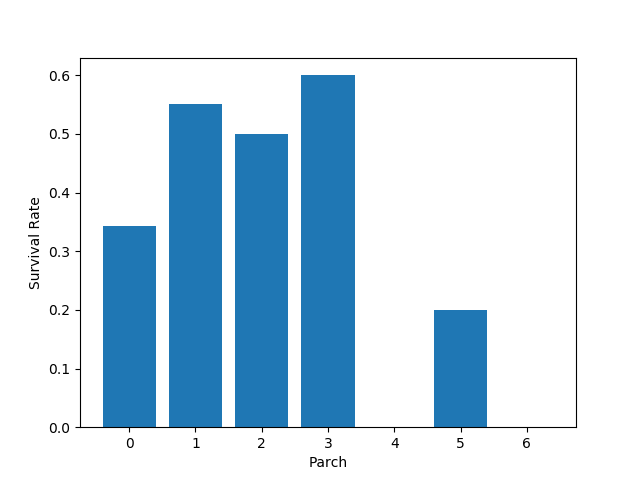

In [38]:
parch_sur=train_data.groupby('Parch').mean().Survived
plt.figure()
plt.bar(parch_sur.index,parch_sur)
plt.ylabel('Survival Rate')
plt.xlabel('Parch')

## Embarked coorelation

In [39]:
train_data.groupby('Embarked').mean().Survived

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [40]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_data